### Selecting the path of the dataset

In [1]:
cd D:\Documents\Python\Python_tutorial\DataScience (tutorial)\Practice Files\Data Set

D:\Documents\Python\Python_tutorial\DataScience (tutorial)\Practice Files\Data Set


### List of packages

In [2]:
conda list

# packages in environment at C:\Users\User\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
alabaster                 0.7.12                   py37_0  
anaconda                  2020.02                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.12                   py37_0  
anaconda-project          0.8.4                      py_0  
argh                      0.26.2                   py37_0  
asn1crypto                1.3.0                    py37_0  
astroid                   2.3.3                    py37_0  
astropy                   4.0              py37he774522_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.3.0                     py_0  
autopep8                  1.4.4                      py_0  
babel                     2.8.0                      py_0  
backcall                  0.1.0      

### Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
%matplotlib inline

### Reading the dataset

In [4]:
insurance_df = pd.read_csv('insurance_data.csv')

### Checking the top 5 records

In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Finding the shape of the dataset

In [6]:
insurance_df.shape

(1338, 7)

### Using info() method to obtain a concise summary of the dataframe's structure and information

In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Checking the null values in the columns

In [9]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Visualization of the distribution of the feature "age" by distplot

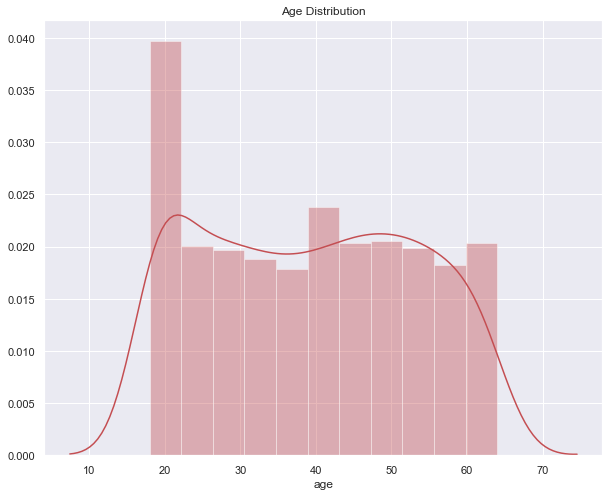

In [10]:
# Distribution of age column using distplot
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(insurance_df['age'],color='r')
plt.title('Age Distribution')
plt.show()

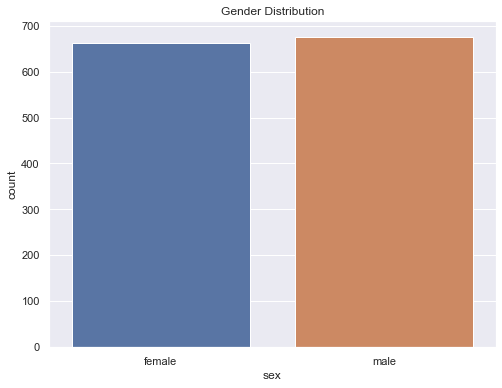

In [11]:
# Gender column
plt.figure(figsize=(8,6))
sns.countplot(x='sex', data=insurance_df)
plt.title('Gender Distribution')
plt.show()

In [12]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
insurance_df['bmi'].value_counts()

32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

### Visualization of the distinct values of the feature "smoker" by countplot

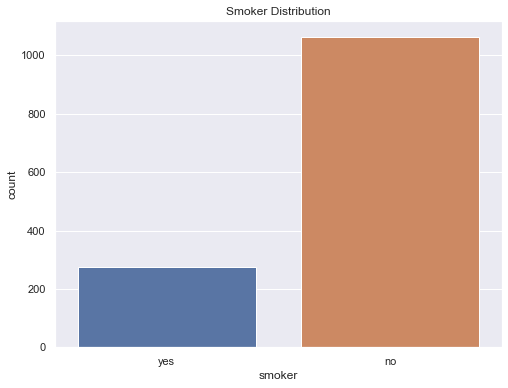

In [16]:
# Gender column
plt.figure(figsize=(8,6))
sns.countplot(x='smoker', data=insurance_df)
plt.title('Smoker Distribution')
plt.show()

### Visualization of the distribution of the feature "BMI" by distplot

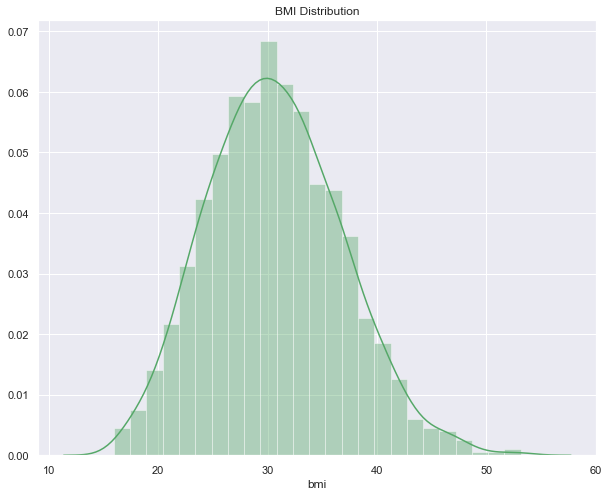

In [17]:
# Distribution of BMI column using distplot
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(insurance_df['bmi'],color='g')
plt.title('BMI Distribution')
plt.show()

### Converting the datatype of the feature "Sex" from categorical to numerical

In [18]:
insurance_df['sex'] = insurance_df['sex'].map({'male':1,'female':0})

### Checking the distinct values of the feature 'Sex'

In [19]:
insurance_df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

### Visualization of the distinct values of the feature "region" by countplot

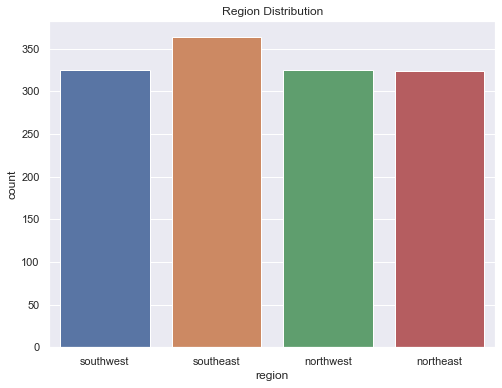

In [20]:
# Region column
plt.figure(figsize=(8,6))
sns.countplot(x='region', data=insurance_df)
plt.title('Region Distribution')
plt.show()

### Visualization of the distribution of the feature "Charges" by distplot

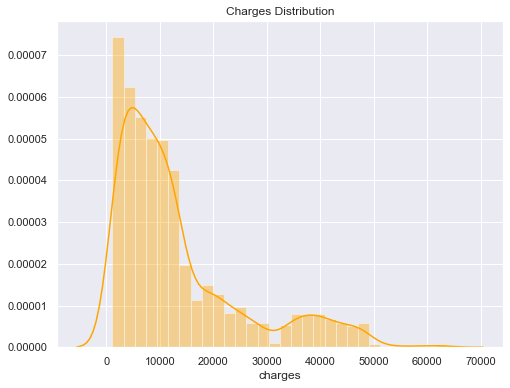

In [21]:
# distribution of Charges
plt.figure(figsize=(8,6))
sns.distplot(insurance_df['charges'], color="orange")
plt.title('Charges Distribution')
plt.show()

### Converting the datatype of the feature "smoker" from categorical to numerical

In [22]:
insurance_df['smoker'] = insurance_df['smoker'].map({'yes':1,'no':0})

### Checking the number of distinct values of feature "smoker"

In [23]:
insurance_df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

### Converting the datatype of the feature "region" from categorical to numerical

In [24]:
insurance_df['region'] = insurance_df['region'].map({'southeast':1,'southwest':0,'northeast':2,'northwest':3})

In [25]:
insurance_df['region'].value_counts()

1    364
3    325
0    325
2    324
Name: region, dtype: int64

In [26]:
X = insurance_df.drop(columns='charges', axis=1)
y = insurance_df['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the dataset into test and training set 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [29]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


### Creating an instance of the Linear Regression Model

In [30]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred=linreg.predict(X_test)

In [32]:
training_preg = linreg.predict(X_train)

In [33]:
train_r2 = metrics.r2_score(y_train,training_preg)

### Finding the R Squared value of Training Set

In [34]:
print('R Squared value of Training Set: ',train_r2)

R Squared value of Training Set:  0.7366063692669162


### Finding the R Squared value of Testing Set

In [35]:
test_r2 = metrics.r2_score(y_test,y_pred)
print('R Squared value of Testing Set: ',test_r2)

R Squared value of Testing Set:  0.7990754766195023


### Testing the model with new data

In [36]:
# Input Data
new_data = (45, 1, 33.74, 2, 0, 3)

# Converting input_data to a numpy array
new_data_array = np.asarray(new_data)

# Reshaping the array
new_data_array_reshaped = new_data_array.reshape(1, -1)

# Making Prediction
prediction_res = linreg.predict(new_data_array_reshaped)
print(prediction_res)

# Displaying the Prediction
print('\n The Insurance charge is USD: $',prediction_res[0])

[11625.24163959]

 The Insurance charge is USD: $ 11625.241639588012
